In this notebook we'll look at how the magnetic fields produced by an underground circuit vary with the circuit depth. This is a good example of a task that would be quite difficult to do quickly with the old FIELDS program. This notebook makes use of some basic `matplotlib` and `pandas` in addition to emf.fields.

In [1]:
from emf import fields as fld
import pandas as pd
import matplotlib.pyplot as plt
#special command to produce plots inline
%matplotlib inline

In [2]:
#first construct a CrossSection with a single underground circuit
# in the "delta" configuration
a = fld.Conductor('a', [-0.5, -3, 1, 0.75, 0.75, 118, 200, 0])
b = fld.Conductor('b', dict(x=0, y=-3 - 1./2**(0.5), phase=120), a)
c = fld.Conductor('c', dict(x=0.5, phase=240), a)
xs = fld.CrossSection('delta-depth-test', [a, b, c], 'ddt', 'Delta Depth Test')
xs.lROW = -25
xs.rROW = 25
xs.max_dist = 25

To test how the fields change with increasing conductor depth, we'll decrement the height of all the conductors until the shallowest one is 30 ft deep. Along the way we'll store the depth, the maximum of Bmax in the cross section, and the value of Bmax at the right ROW edge.

In [3]:
#we'll take the shallowest conductors down to 30 ft
#list for the maximum Bmax value in the cross section
Bmaxmax = [xs.fields['Bmax'].max()]
#list for Bmax at the right ROW edge
Bmaxr = [xs.fields['Bmax'].at[xs.rROW]]
#list for the depth of the shallowest conductor
dep = [max(xs.y)] 
while(max(xs.y) >= -30.0):
    #lower the height of each conductor by a tiny bit
    for c in xs:
        c.y -= 0.1
    #store the depth of the shallowest conductor
    dep.append(max(xs.y))
    #store the fields
    Bmaxmax.append(xs.fields['Bmax'].max())
    Bmaxr.append(xs.fields['Bmax'].at[xs.rROW])

In [4]:
#export the results
df = pd.DataFrame({'Maximum Bmax': Bmaxmax, 'Bmax at rROW': Bmaxr}, index=dep)
df.to_csv('delta-depth-test.csv', index_label='Shallowest Conductor Depth (ft)')

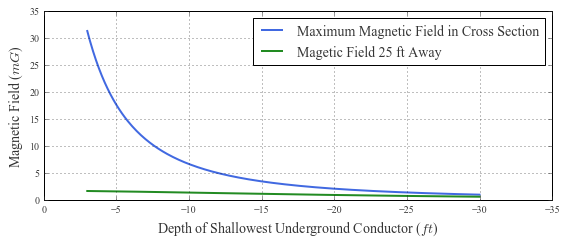

In [5]:
#plot the results
fig, ax = plt.subplots(1, 1, figsize=(8,3.5))
ax.plot(dep, Bmaxmax, linewidth=2, color='royalblue',
        label='Maximum Magnetic Field in Cross Section')
ax.plot(dep, Bmaxr, linewidth=2, color='forestgreen',
        label='Magetic Field %g ft Away' % xs.rROW)
ax.set_xlim(0, ax.get_xlim()[0])
ax.legend(loc='upper right', borderaxespad=0.5)
ax.grid(True)
ax.set_xlabel('Depth of Shallowest Underground Conductor ($ft$)')
ax.set_ylabel('Magnetic Field ($mG$)')
fig.tight_layout()
fn = 'fields-vs-depth'
fig.savefig(fn)

All done. We can see that the value of Bmax at the right ROW edge does not change very much as the circuit is deepened. With the plot above, we could easily answer questions about how deep the circuit would need to be buried to produce fields of certain magnitudes. Of course, 30 ft would be excessive.